## Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Loading the dataset :

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/ML PFE/supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Exploring the dataset:

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.shape

(1000, 17)

In [7]:
df.duplicated().sum()

0

In [8]:
nans=df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques=df.nunique()
noted=pd.concat([nans,pct,uniques,df.dtypes],axis=1)
noted.columns=['Null count','Null percentage','n_unique values','data_type']
noted

,Null count,Null percentage,n_unique values,data_type
Invoice ID,0,0.0,1000,object
Total,0,0.0,990,float64
gross income,0,0.0,990,float64
gross margin percentage,0,0.0,1,float64
cogs,0,0.0,990,float64
Payment,0,0.0,3,object
Time,0,0.0,506,object
Date,0,0.0,89,object
Tax 5%,0,0.0,990,float64
Branch,0,0.0,3,object


> The dataset contains 1000 rows and 17 columns and no null values.

## Cleaning & Visualisation:

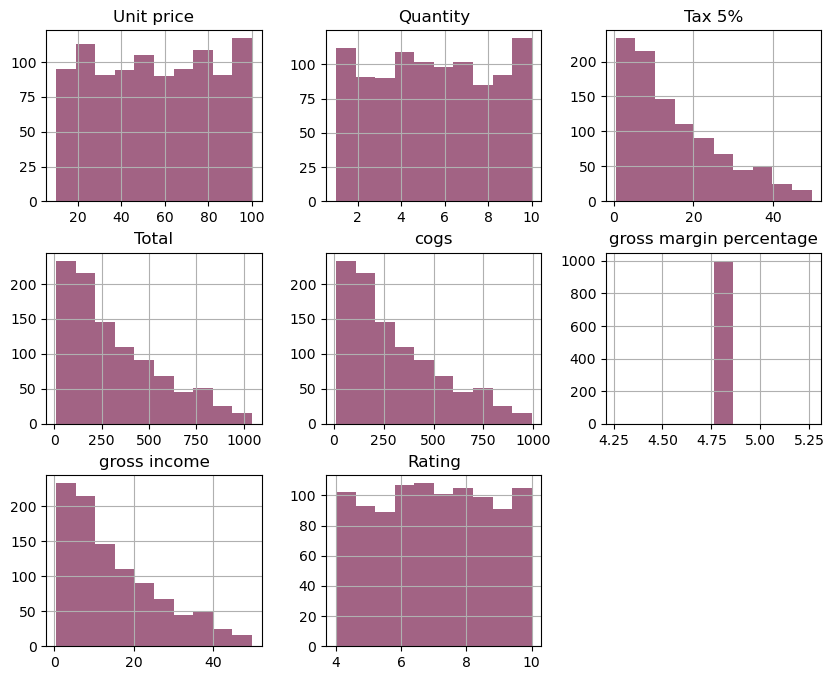

In [9]:
df.hist(figsize=(10,8),color=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266),alpha=0.7)
plt.show()

### Correlation:

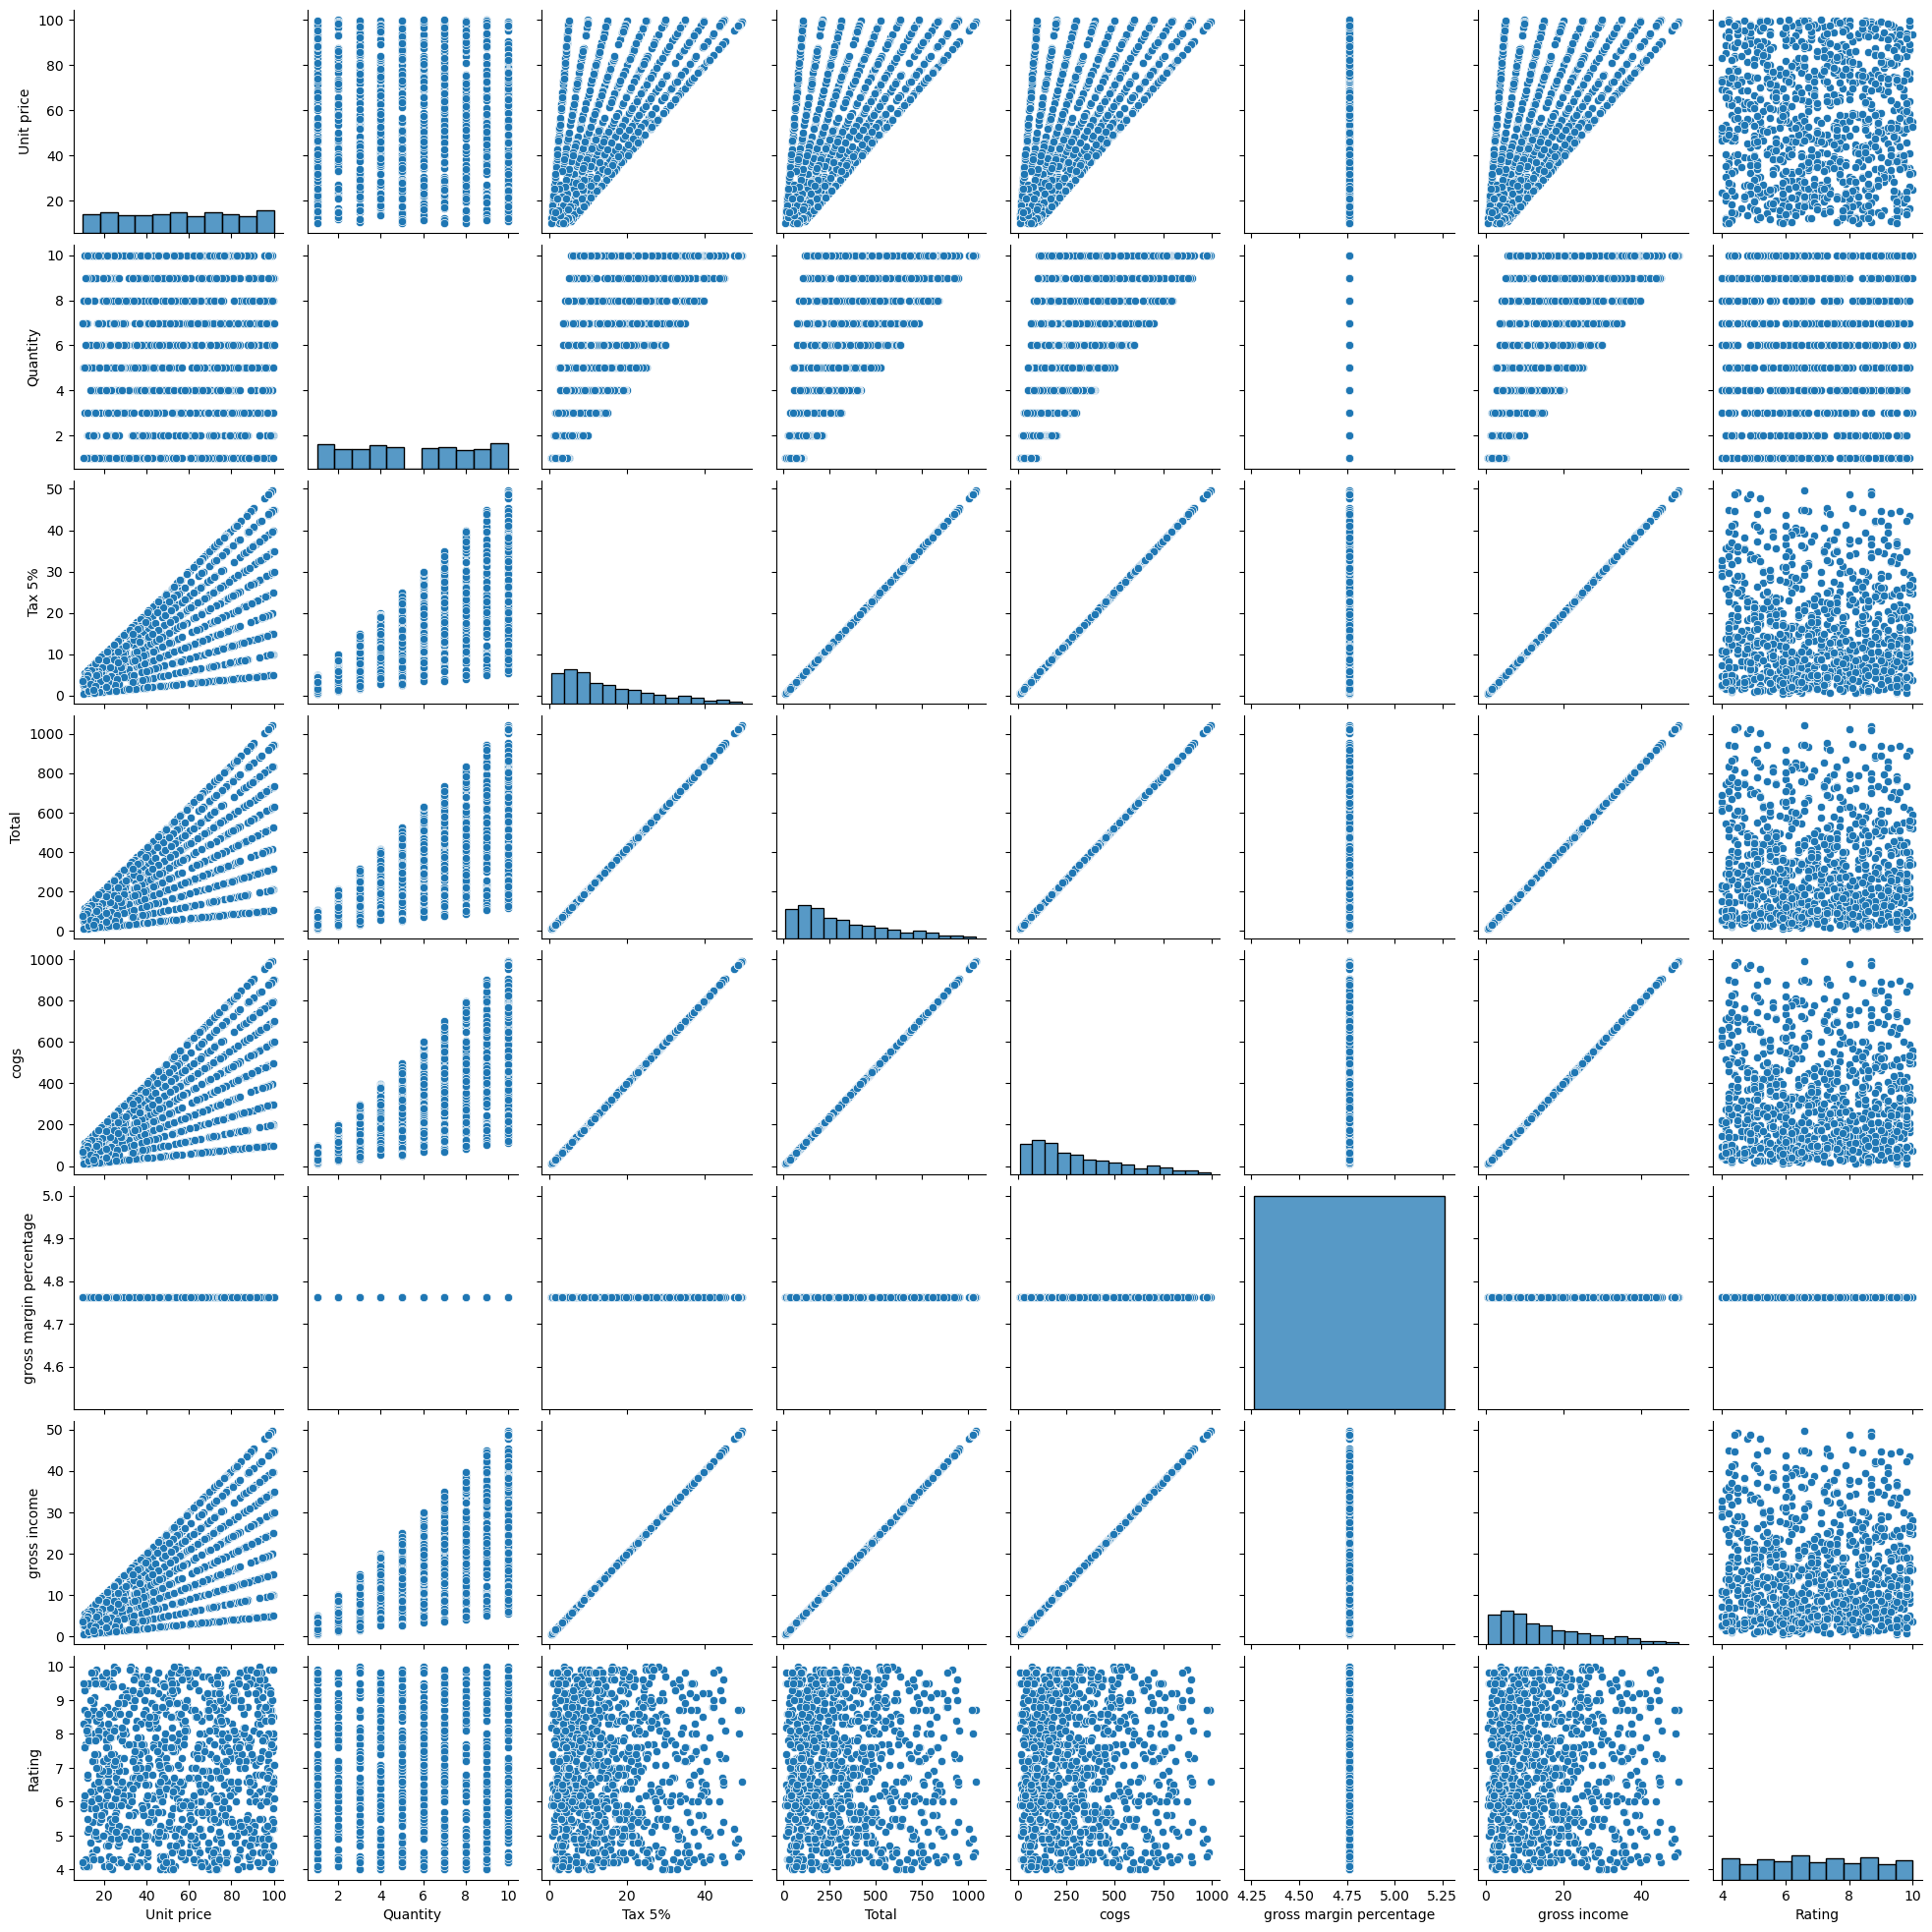

In [10]:
sns.pairplot(data=df)

In [11]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

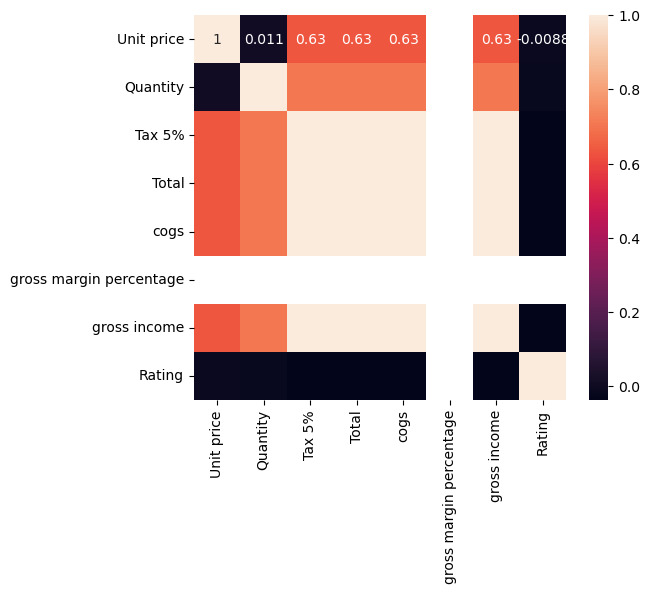

In [12]:
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(numeric_only=True), annot =True)

> There is a strong correlation between (**'Tax 5%'**,**'cogs'**,**'total'**) columns.  
> There is no correlation between **'gender'** and **'rating'** or between **'rating'** and **'total'** or **'gross income'**.

In [13]:
(df['gross income']==df['Tax 5%']).sum()

1000

In [14]:
df['gross margin percentage'].unique()

array([4.76190476])

In [15]:
df.drop(['Tax 5%','gross margin percentage'],inplace=True,axis=1)

>We observed the column **'Tax 5%'** in its relationship with **'gross income'** and concluded that both columns were equal in values, which led us to drop the column **'Tax 5%'**.
>We droped the **'gross margin percentage'** column because as we analyzed it, we found that it only contains 1 unique value, therefore, we figured that it adds no additional value.

In [16]:
tolerance = 1e-6 
filt=(df['cogs']/ (df['Quantity']*df['Unit price'])-1)<tolerance
df[~filt]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating


>The 'cogs' column is calculated such that: **'cogs'= 'Quantity' * 'Unit price'**. By setting a tolerance level and filtering out discrepancies, we wanted to ensure data integrity and identify any potential inconsistencies early in the EDA process.

In [17]:
df.drop('Invoice ID',axis=1,inplace=True)

> We droped the column **'Invoice ID'** since it adds no additional value.

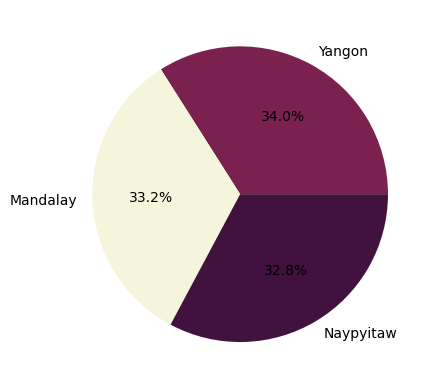

In [18]:
city_count=df['City'].value_counts()
pie_color=[(0.48366628618847957, 0.1286467902201389, 0.31317188565991266),'beige',(0.2558213554748177, 0.06953231029187984, 0.24112190491594204)]
plt.pie(city_count.values,labels=city_count.index, colors=pie_color,autopct='%1.1f%%')
plt.show()

> The supermarket has three branches in different cities and all of them have almost equal contribution in sales.

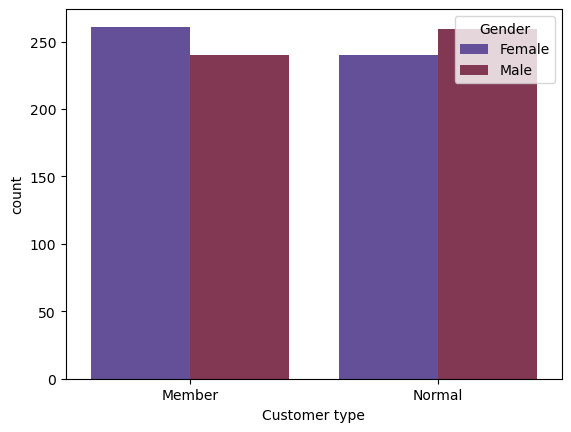

In [19]:
sns.countplot(data=df,x='Customer type',hue='Gender',palette='twilight')
plt.show()

In [20]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

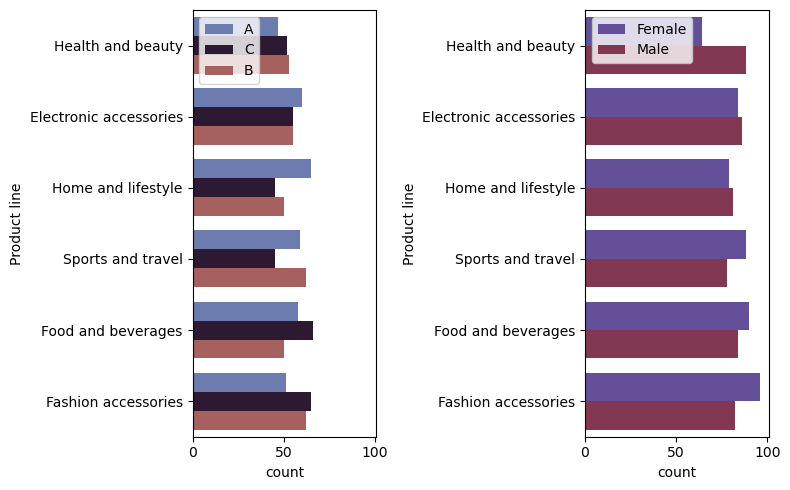

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,5),sharex=True)

sns.countplot(data=df,y='Product line',hue='Branch',palette='twilight',ax=ax[0])
ax[0].legend(loc='upper left')

sns.countplot(data=df,y='Product line',hue='Gender',palette='twilight',ax=ax[1])
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

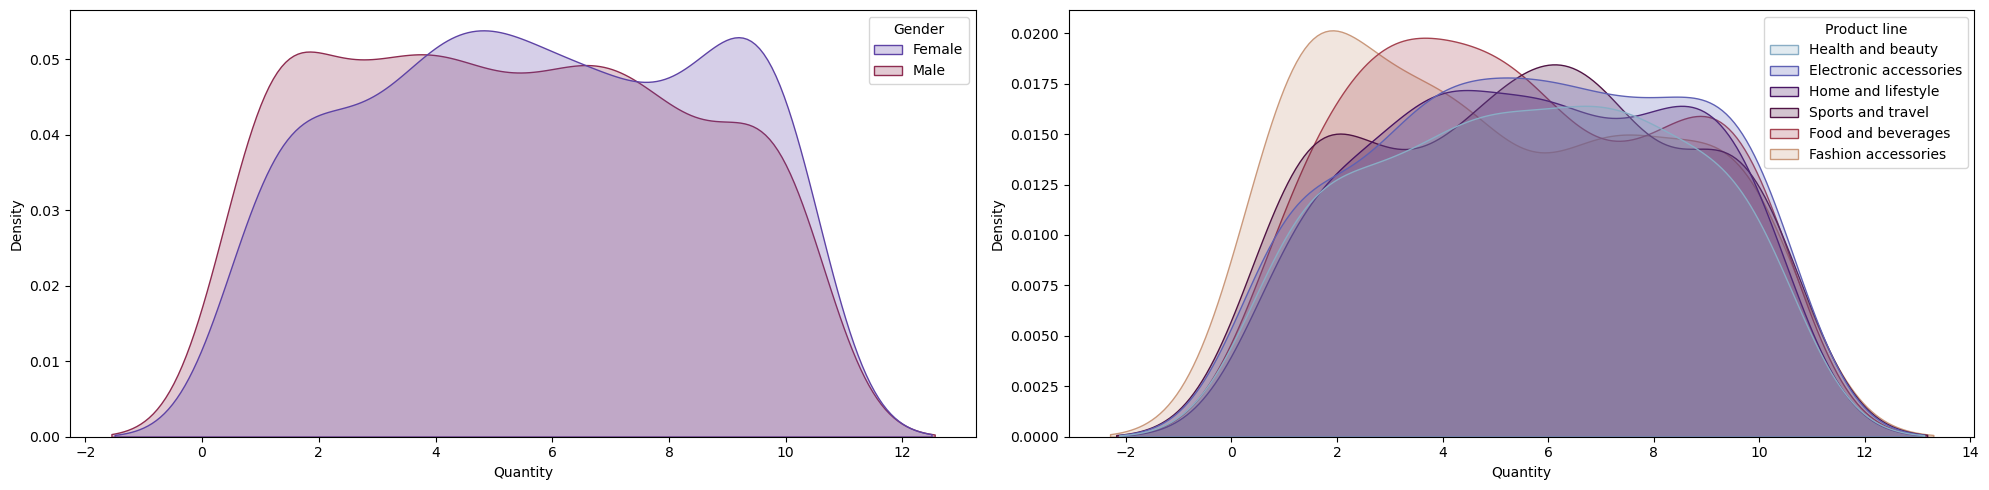

In [22]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.kdeplot(data=df,x='Quantity',hue='Gender',palette='twilight',fill=True,ax=axs[0])
sns.kdeplot(data=df,x='Quantity',hue='Product line',palette='twilight',fill=True,ax=axs[1],legend=True)
plt.tight_layout()
plt.show()

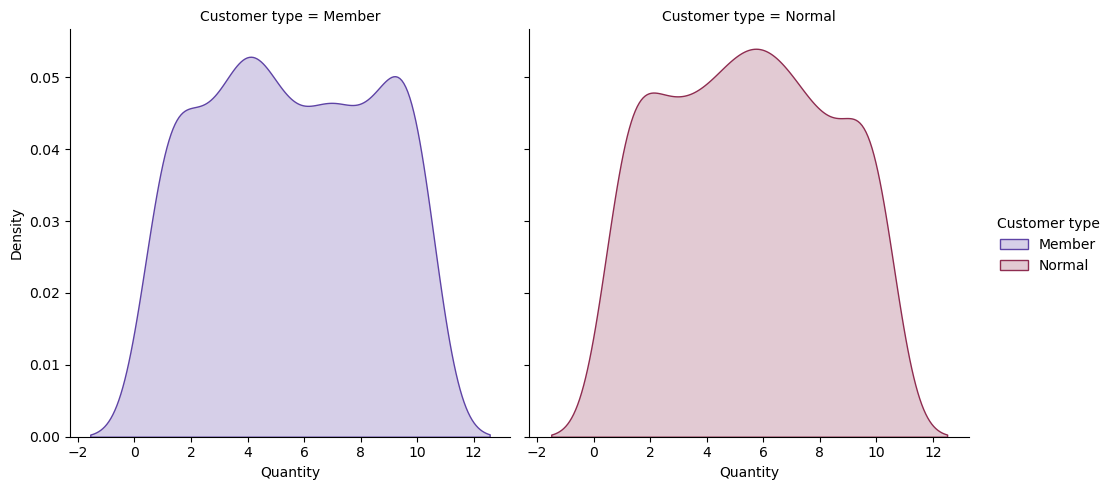

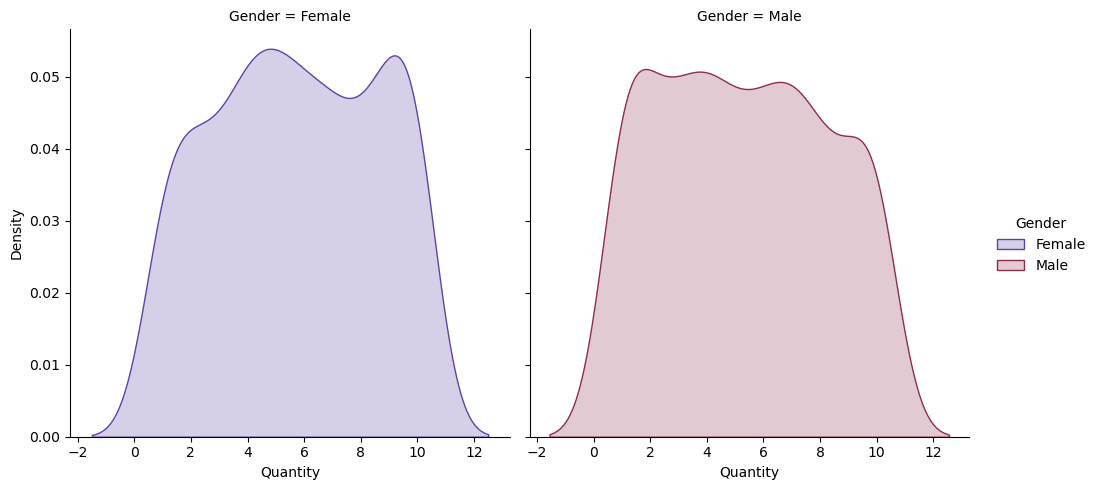

In [23]:
sns.displot(data=df,x='Quantity',hue='Customer type',col='Customer type',palette='twilight',kind='kde',fill=True)
sns.displot(data=df,x='Quantity',hue='Gender',col='Gender',palette='twilight',kind='kde',fill=True)
plt.show()

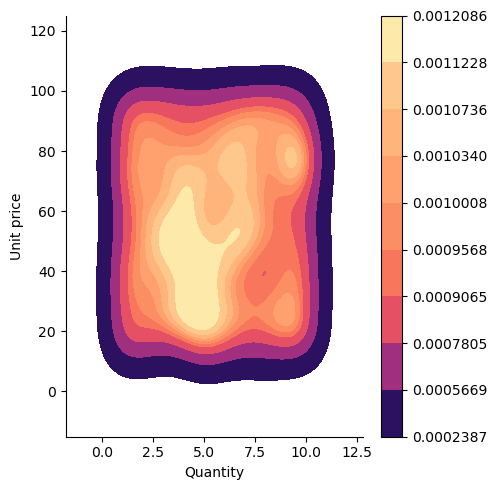

In [24]:
sns.displot(data=df,x='Quantity',y='Unit price',cmap='magma',kind='kde',fill=True,cbar=True)
plt.show()

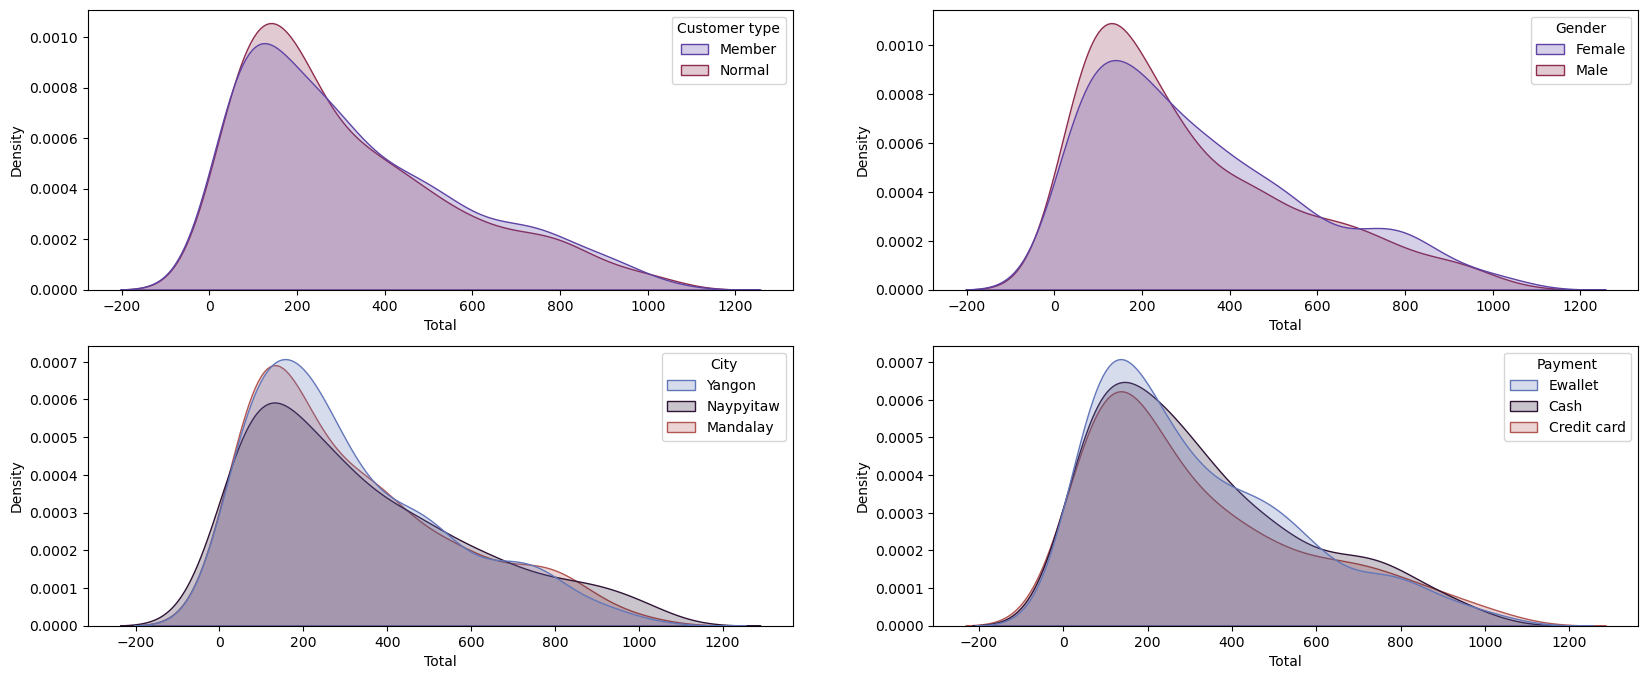

In [25]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.kdeplot(data=df,x='Total',hue='Customer type',ax=ax[0,0],palette='twilight',fill=True)
sns.kdeplot(data=df,x='Total',hue='Gender',ax=ax[0,1],palette='twilight',fill=True)
sns.kdeplot(data=df,x='Total',hue='City',ax=ax[1,0],palette='twilight',fill=True)
sns.kdeplot(data=df,x='Total',hue='Payment',ax=ax[1,1],palette='twilight',fill=True)

plt.show()

> From the above figures, we can tell that the male clients tend to spend more than the females.

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month

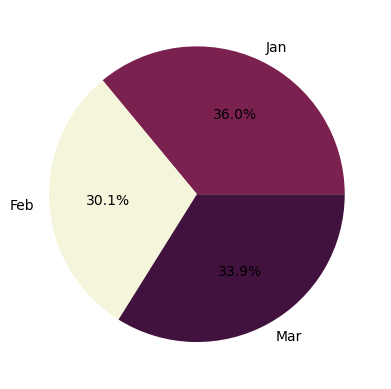

In [27]:
date_group=df.groupby(df['Date'].dt.month).agg({'Total':sum})
plt.pie(date_group['Total'],autopct='%1.1f%%',labels=['Jan','Feb','Mar'],colors=pie_color)
plt.show()

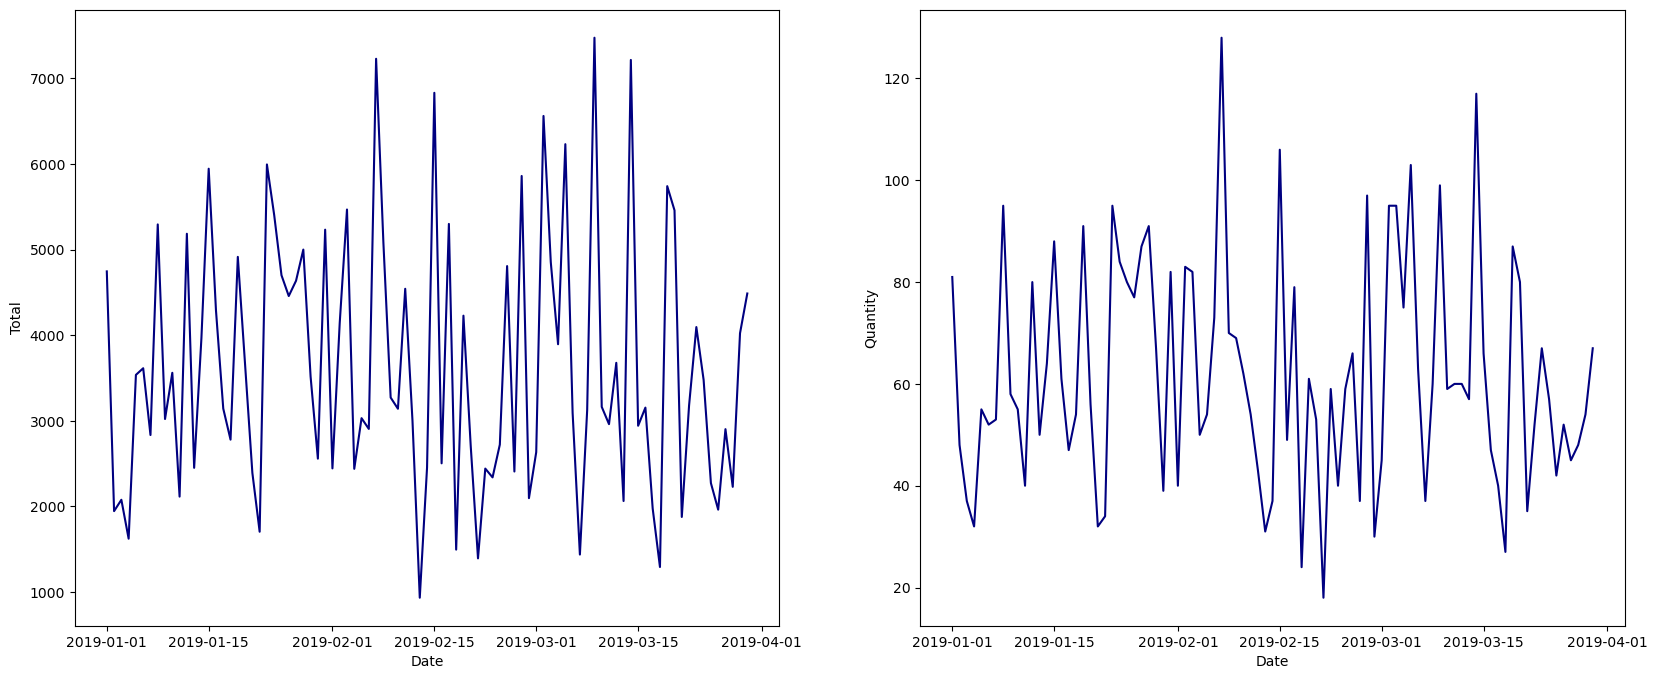

In [28]:
date_group2=df.groupby(['Date','Month']).agg({'Total':sum,'Quantity':sum})
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.lineplot(data=date_group2,x='Date',y='Total',color='navy',ax=ax[0])
sns.lineplot(data=date_group2,x='Date',y='Quantity',color='navy',ax=ax[1])

plt.show()

In [29]:
df['Time'] = pd.to_datetime(df['Time'])
df['hour']=df['Time'].dt.hour

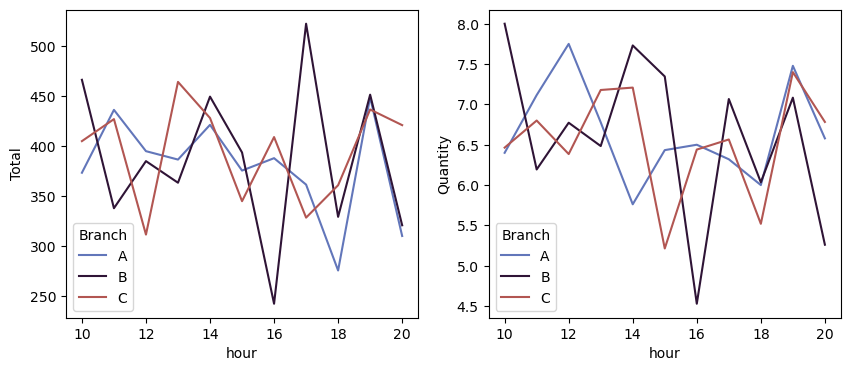

In [30]:
date_group3=df.groupby(['Date','Branch','hour']).agg({'Total':sum,'Quantity':sum})
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.lineplot(data=date_group3,x='hour',y='Total',palette='twilight',hue='Branch',ax=ax[0],ci=None)
sns.lineplot(data=date_group3,x='hour',y='Quantity',palette='twilight',hue='Branch',ax=ax[1],ci=None)

plt.show()

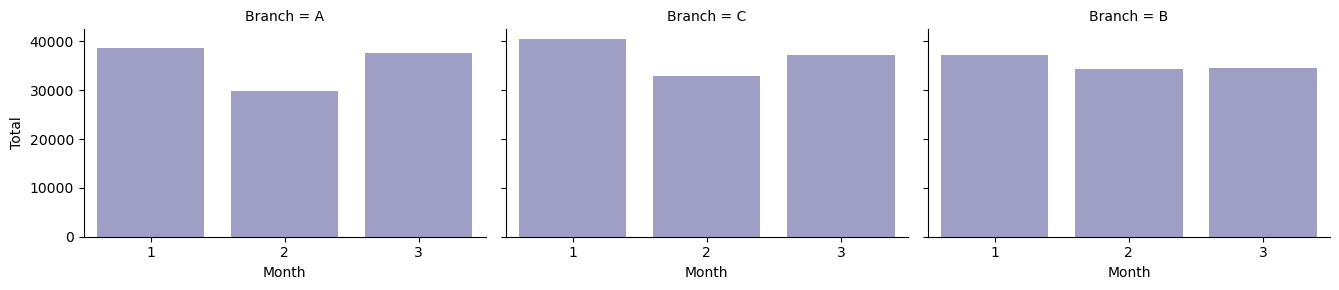

In [31]:
g2 = sns.FacetGrid(data=df,col="Branch",palette="twilight",
                  height=3, aspect=1.5)
df['Month']=df['Month'].astype('category')
g2.map(sns.barplot,'Month','Total', data=df,order=[1,2,3],dodge=False,estimator='sum',ci=None,color='navy',alpha=0.4)

plt.show()

> The highest total sales value across all branches is during Jan then Mar and then Feb

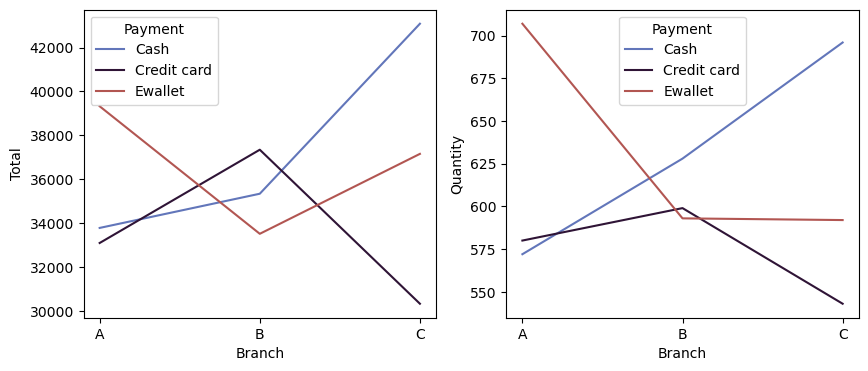

In [32]:
data_group4=df.groupby(['Branch','Payment']).agg({'Total':sum,'Quantity':sum})
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.lineplot(data=data_group4,x='Branch',y='Total',palette='twilight',hue='Payment',ax=ax[0],ci=None)
sns.lineplot(data=data_group4,x='Branch',y='Quantity',palette='twilight',hue='Payment',ax=ax[1],ci=None)

plt.show()

> In branch A, most clients use Ewallets, in B most of them use credit cards and in C most of them use cash.

> In branch A, clients who use Ewallets tend to buy more quantities than the others, in B and C, customers who use cash tend to buy more quantities than the others.

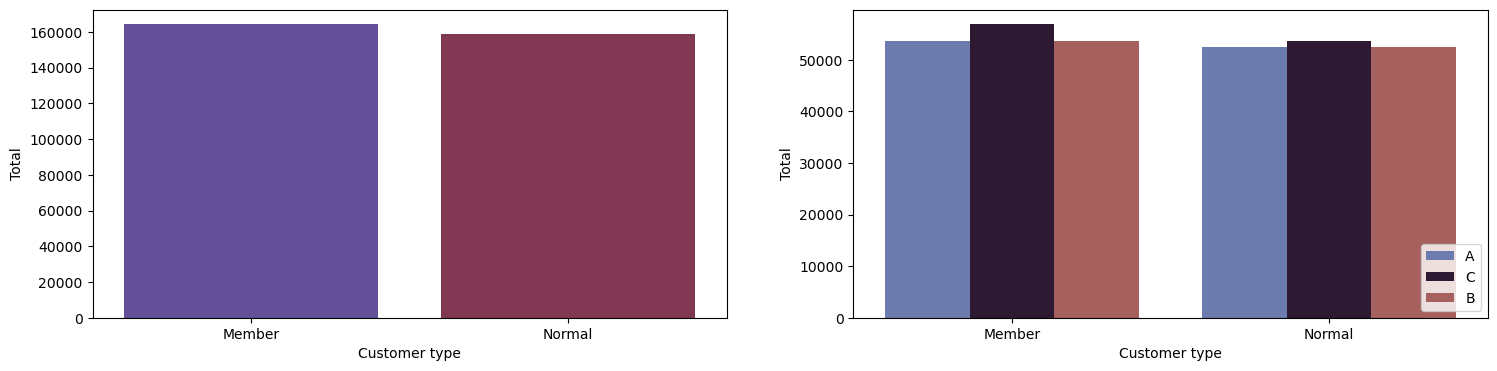

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,4))
sns.barplot(data=df,x='Customer type',y='Total',estimator='sum',ci=None,palette='twilight' ,ax=ax[0])
sns.barplot(data=df,x='Customer type',y='Total',estimator='sum',hue='Branch',ci=None,palette='twilight', ax=ax[1])
plt.legend(loc='lower right')
plt.show()

> The difference in the total buyings between the two customer types is small, but the **'Member'** type has higher total buyings than the the **'Normal'**


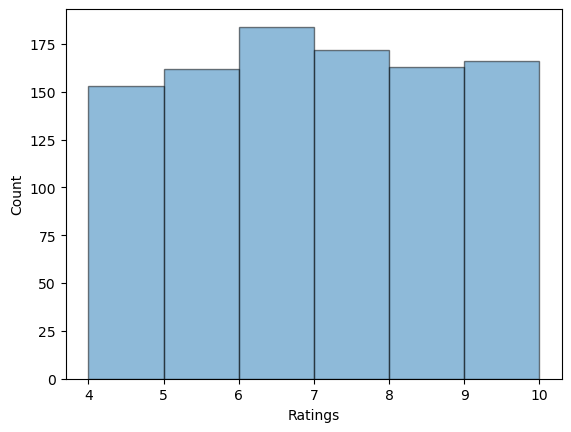

In [34]:
plt.hist(df['Rating'],bins=[4,5,6,7,8,9,10],edgecolor='black',alpha=0.5)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

> Most of the customers choose ratings between [6:7].

In [35]:
df.drop(['Total','Month','hour'],inplace=True,axis=1)

> We droped the column **'Total'** because we chose to keep the **'gross income'** and use it as our output variable. Since both columns are logically the same, they both represent sales.

In [36]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,2024-04-17 13:08:00,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2024-04-17 10:29:00,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2024-04-17 13:23:00,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,2024-04-17 20:33:00,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,2024-04-17 10:37:00,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,2024-04-17 13:46:00,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,2024-04-17 17:16:00,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,2024-04-17 13:22:00,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,2024-04-17 15:33:00,Cash,65.82,3.2910,4.1


> To perform our sales prediction, we need all the data types of every column to be numerical, this is why we have to convert both **'Date'** and **'Time'** data to integers.

In [37]:
import datetime as dt 
df['Date'] = pd.to_datetime(df['Date']) 
df['Date']=df['Date'].map(dt.datetime.toordinal)

> We converted the **'Date'** column into numerical data type, the new values represent now represent the number of days since January 1, 1 AD.

In [38]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

df['Minutes_Since_Midnight'] = df['Hour'] * 60 + df['Minute']

> We also converted the values in the **'Time'** column into integer data type, replacing it with the number of minutes since midnight.

In [39]:
df.drop(['Hour','Minute','Time'],inplace=True,axis=1)

In [40]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,cogs,gross income,Rating,Minutes_Since_Midnight
0,A,Yangon,Member,Female,Health and beauty,74.69,7,737064,Ewallet,522.83,26.1415,9.1,788
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,737126,Cash,76.40,3.8200,9.6,629
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,737121,Credit card,324.31,16.2155,7.4,803
3,A,Yangon,Member,Male,Health and beauty,58.22,8,737086,Ewallet,465.76,23.2880,8.4,1233
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,737098,Ewallet,604.17,30.2085,5.3,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,737088,Ewallet,40.35,2.0175,6.2,826
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,737120,Ewallet,973.80,48.6900,4.4,1036
997,A,Yangon,Member,Male,Food and beverages,31.84,1,737099,Cash,31.84,1.5920,7.7,802
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,737112,Cash,65.82,3.2910,4.1,933


### Label encoding

> Now since we still have category data types, we will need to convert those to numerical data types as well, and to do that we will use Label Encoding.

In [41]:
le=LabelEncoder()
list_cate = ['Branch','City', 'Customer type', 'Gender', 'Product line', 'Payment']
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [42]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,cogs,gross income,Rating,Minutes_Since_Midnight
0,0,2,0,0,3,74.69,7,737064,2,522.83,26.1415,9.1,788
1,2,1,1,0,0,15.28,5,737126,0,76.40,3.8200,9.6,629
2,0,2,1,1,4,46.33,7,737121,1,324.31,16.2155,7.4,803
3,0,2,0,1,3,58.22,8,737086,2,465.76,23.2880,8.4,1233
4,0,2,1,1,5,86.31,7,737098,2,604.17,30.2085,5.3,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,737088,2,40.35,2.0175,6.2,826
996,1,0,1,0,4,97.38,10,737120,2,973.80,48.6900,4.4,1036
997,0,2,0,1,2,31.84,1,737099,0,31.84,1.5920,7.7,802
998,0,2,1,1,4,65.82,1,737112,0,65.82,3.2910,4.1,933


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Branch                  1000 non-null   int32  
 1   City                    1000 non-null   int32  
 2   Customer type           1000 non-null   int32  
 3   Gender                  1000 non-null   int32  
 4   Product line            1000 non-null   int32  
 5   Unit price              1000 non-null   float64
 6   Quantity                1000 non-null   int64  
 7   Date                    1000 non-null   int64  
 8   Payment                 1000 non-null   int32  
 9   cogs                    1000 non-null   float64
 10  gross income            1000 non-null   float64
 11  Rating                  1000 non-null   float64
 12  Minutes_Since_Midnight  1000 non-null   int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 74.3 KB
